In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['training.zip', 'validation', 'validation.zip', 'training', 'monkey_labels.txt']


In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
import time

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.1.2
numpy 1.17.4
pandas 0.25.3
sklearn 0.21.3
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [3]:
train_dir = "../input/training/training"
valid_dir = "../input/validation/validation"
label_file = "../input/monkey_labels.txt"
print(os.path.exists(train_dir))
print(os.path.exists(valid_dir))
print(os.path.exists(label_file))

print(os.listdir(train_dir))
print(os.listdir(valid_dir))

True
True
True
['n8', 'n6', 'n1', 'n4', 'n9', 'n7', 'n0', 'n3', 'n2', 'n5']
['n8', 'n6', 'n1', 'n4', 'n9', 'n7', 'n0', 'n3', 'n2', 'n5']


In [4]:
labels = pd.read_csv(label_file, header=0)
print(labels)

   Label     Latin Name              Common Name                     \
0  n0         alouatta_palliata\t    mantled_howler                   
1  n1        erythrocebus_patas\t    patas_monkey                     
2  n2        cacajao_calvus\t        bald_uakari                      
3  n3        macaca_fuscata\t        japanese_macaque                 
4  n4       cebuella_pygmea\t        pygmy_marmoset                   
5  n5       cebus_capucinus\t        white_headed_capuchin            
6  n6       mico_argentatus\t        silvery_marmoset                 
7  n7      saimiri_sciureus\t        common_squirrel_monkey           
8  n8       aotus_nigriceps\t        black_headed_night_monkey        
9  n9       trachypithecus_johnii    nilgiri_langur                   

    Train Images    Validation Images  
0             131                  26  
1             139                  28  
2             137                  27  
3             152                  30  
4             131 

In [5]:
height = 224
width = 224
channels = 3
batch_size = 24
num_classes = 10

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = keras.applications.resnet50.preprocess_input,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (height, width),
                                                   batch_size = batch_size,
                                                   seed = 7,
                                                   shuffle = True,
                                                   class_mode = "categorical")
valid_datagen = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = keras.applications.resnet50.preprocess_input)
valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size = (height, width),
                                                    batch_size = batch_size,
                                                    seed = 7,
                                                    shuffle = False,
                                                    class_mode = "categorical")
train_num = train_generator.samples
valid_num = valid_generator.samples
print(train_num, valid_num)

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.
1098 272


In [6]:
for i in range(2):
    x, y = train_generator.next()
    print(x.shape, y.shape)
    print(y)

(24, 224, 224, 3) (24, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
(24, 224, 224, 3) (24, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0

In [7]:
resnet50_fine_tune = keras.models.Sequential()
resnet50_fine_tune.add(keras.applications.ResNet50(include_top = False,
                                                   pooling = 'avg',
                                                   weights = 'imagenet'))
resnet50_fine_tune.add(keras.layers.Dense(num_classes, activation = 'softmax'))
resnet50_fine_tune.layers[0].trainable = False

resnet50_fine_tune.compile(loss="categorical_crossentropy",
                           optimizer="sgd", metrics=['accuracy'])
resnet50_fine_tune.summary()

94773248/94765736 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 10)                20490     
Total params: 23,608,202
Trainable params: 20,490
Non-trainable params: 23,587,712
_________________________________________________________________


In [8]:
epochs = 10
history = resnet50_fine_tune.fit_generator(train_generator,
                                           steps_per_epoch = train_num // batch_size,
                                           epochs = epochs,
                                           validation_data = valid_generator,
                                           validation_steps = valid_num // batch_size)

Epoch 1/10
45/45 [==============================] - 38s 835ms/step - loss: 1.6443 - accuracy: 0.4981 - val_loss: 0.6556 - val_accuracy: 0.8333
Epoch 2/10
45/45 [==============================] - 36s 799ms/step - loss: 0.7451 - accuracy: 0.8324 - val_loss: 0.3928 - val_accuracy: 0.8939
Epoch 3/10
45/45 [==============================] - 36s 807ms/step - loss: 0.4563 - accuracy: 0.9153 - val_loss: 0.2963 - val_accuracy: 0.9129
Epoch 4/10
45/45 [==============================] - 36s 790ms/step - loss: 0.3735 - accuracy: 0.9358 - val_loss: 0.2652 - val_accuracy: 0.9205
Epoch 5/10
45/45 [==============================] - 35s 787ms/step - loss: 0.3096 - accuracy: 0.9367 - val_loss: 0.2176 - val_accuracy: 0.9280
Epoch 6/10
45/45 [==============================] - 34s 763ms/step - loss: 0.2472 - accuracy: 0.9544 - val_loss: 0.2227 - val_accuracy: 0.9356
Epoch 7/10
45/45 [==============================] - 34s 752ms/step - loss: 0.2266 - accuracy: 0.9600 - val_loss: 0.1947 - val_accuracy: 0.9318

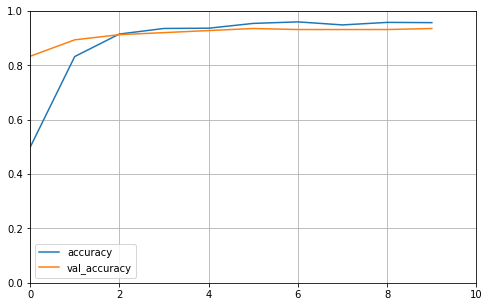

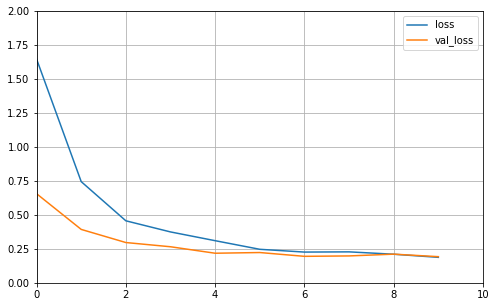

In [9]:
def plot_learning_curves(history, label, epcohs, min_value, max_value):
    data = {}
    data[label] = history.history[label]
    data['val_'+label] = history.history['val_'+label]
    pd.DataFrame(data).plot(figsize=(8, 5))
    plt.grid(True)
    plt.axis([0, epochs, min_value, max_value])
    plt.show()
    
plot_learning_curves(history, 'accuracy', epochs, 0, 1)
plot_learning_curves(history, 'loss', epochs, 0, 2)

In [10]:
resnet50 = keras.applications.ResNet50(include_top = False,
                                       pooling = 'avg',
                                       weights = 'imagenet')
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [11]:
for layer in resnet50.layers[0:-5]:
    layer.trainable = False

resnet50_new = keras.models.Sequential([
    resnet50,
    keras.layers.Dense(num_classes, activation = 'softmax'),
])
resnet50_new.compile(loss="categorical_crossentropy",
                     optimizer="sgd", metrics=['accuracy'])
resnet50_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
Total params: 23,608,202
Trainable params: 1,075,210
Non-trainable params: 22,532,992
_________________________________________________________________


In [12]:
epochs = 10
history = resnet50_new.fit_generator(train_generator,
                                     steps_per_epoch = train_num // batch_size,
                                     epochs = epochs,
                                     validation_data = valid_generator,
                                     validation_steps = valid_num // batch_size)

Epoch 1/10
45/45 [==============================] - 37s 818ms/step - loss: 1.3169 - accuracy: 0.6052 - val_loss: 0.4397 - val_accuracy: 0.8788
Epoch 2/10
45/45 [==============================] - 37s 823ms/step - loss: 0.5206 - accuracy: 0.8883 - val_loss: 0.2759 - val_accuracy: 0.9091
Epoch 3/10
45/45 [==============================] - 36s 791ms/step - loss: 0.3351 - accuracy: 0.9460 - val_loss: 0.1760 - val_accuracy: 0.9508
Epoch 4/10
45/45 [==============================] - 36s 793ms/step - loss: 0.2710 - accuracy: 0.9479 - val_loss: 0.1580 - val_accuracy: 0.9432
Epoch 5/10
45/45 [==============================] - 35s 778ms/step - loss: 0.2265 - accuracy: 0.9497 - val_loss: 0.1415 - val_accuracy: 0.9545
Epoch 6/10
45/45 [==============================] - 34s 761ms/step - loss: 0.1921 - accuracy: 0.9702 - val_loss: 0.1432 - val_accuracy: 0.9508
Epoch 7/10
45/45 [==============================] - 34s 759ms/step - loss: 0.1622 - accuracy: 0.9665 - val_loss: 0.1360 - val_accuracy: 0.9508

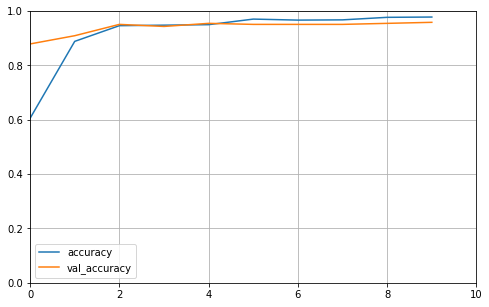

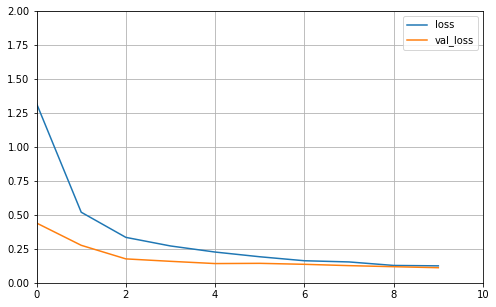

In [13]:
plot_learning_curves(history, 'accuracy', epochs, 0, 1)
plot_learning_curves(history, 'loss', epochs, 0, 2)